**Column Descriptions** 

**id** - Unique identifier for each asteroid.  
**name** - Name given by NASA.  
**est_diameter_min** - Minimum Estimated Diameter (km) in kilometers.  
**est_diameter_max** - Maximum Estimated Diameter (km) in kilometers.  
**relative_velocity** - Velocity relative to Earth.  
**miss_distance** - Distance in kilometers missed.  
**orbiting_body** - Planet that the asteroid orbits.  
**sentry_object** - Included in sentry - an automated collision monitoring system.  
**absolute_magnitude** - Describes intrinsic luminosity.  
**hazardous** - Boolean feature that shows whether asteroid is harmful or not.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [4]:
df=pd.read_csv('neo.csv')

In [5]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [8]:
df['hazardous'].sum()

8840

In [9]:
for i in df.columns.values:
    print(str(i) + ': ' + str(df[i].nunique()))

id: 27423
name: 27423
est_diameter_min: 1638
est_diameter_max: 1638
relative_velocity: 90828
miss_distance: 90536
orbiting_body: 1
sentry_object: 1
absolute_magnitude: 1638
hazardous: 2


In [10]:
df['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [11]:
df['sentry_object'].unique()

array([False])

In [12]:
df.drop(columns=['orbiting_body', 'sentry_object'], inplace=True)

In [13]:
id_count = pd.DataFrame(df.groupby('id')['id'].count())
id_count.columns.values[0] = 'count'
id_count = id_count.sort_values('count', ascending=False)
id_count.head()

,count
id,
2277810,43
2469219,43
3743123,40
2138175,39
3893865,38


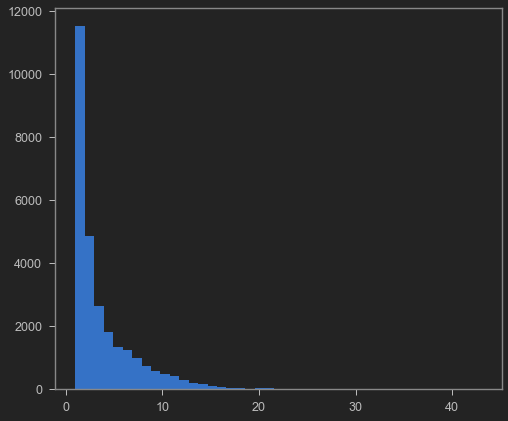

In [14]:
_= plt.hist(id_count, bins=43)

In [15]:
df_2469219 = df[df['id']==2469219]
df_2469219.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
912,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15334.830488,2.105350e+07,24.33,False
2169,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15860.941084,2.297678e+07,24.33,False
3972,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15382.529101,2.032125e+07,24.33,False
5128,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15285.830876,2.345715e+07,24.33,False
6988,2469219,469219 Kamo`oalewa (2016 HO3),0.036187,0.080917,15464.296154,1.954735e+07,24.33,False


In [16]:
df_2469219.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,43.0,4.300000e+01,4.300000e+01,43.000000,4.300000e+01,4.300000e+01
mean,2469219.0,3.618720e-02,8.091704e-02,14308.893919,2.153932e+07,2.433000e+01
std,0.0,7.021014e-18,1.404203e-17,1621.966110,2.861649e+06,1.437904e-14
min,2469219.0,3.618720e-02,8.091704e-02,10742.416563,1.660018e+07,2.433000e+01
25%,2469219.0,3.618720e-02,8.091704e-02,13509.021024,1.892688e+07,2.433000e+01
50%,2469219.0,3.618720e-02,8.091704e-02,15218.964906,2.262092e+07,2.433000e+01
75%,2469219.0,3.618720e-02,8.091704e-02,15426.587597,2.421304e+07,2.433000e+01
max,2469219.0,3.618720e-02,8.091704e-02,16229.052494,2.464646e+07,2.433000e+01


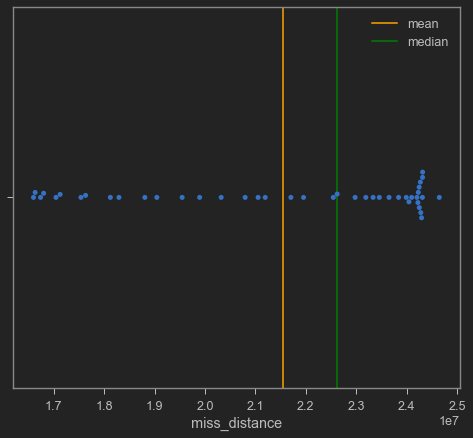

In [17]:
sns.swarmplot(x='miss_distance', data=df_2469219)
plt.axvline(np.mean(df_2469219['miss_distance']), color='orange', label='mean')
plt.axvline(np.median(df_2469219['miss_distance']), color='green', label='median')
_= plt.legend(framealpha=0)

In [18]:
np.mean(df_2469219['miss_distance']), np.median(df_2469219['miss_distance'])

(21539324.409205984, 22620921.894894093)

In [19]:
df['hazardous'] = df['hazardous'].map({True: 1, False: 0})

In [20]:
df['hazardous'].unique()

array([0, 1], dtype=int64)

In [21]:
df = df.pivot_table(index='id', values=df.columns.values[1:])
df.head()

,absolute_magnitude,est_diameter_max,est_diameter_min,hazardous,miss_distance,relative_velocity
id,,,,,,
2000433,10.31,51.527608,23.043847,0,3.754117e+07,19682.887099
2000719,15.57,4.571303,2.044349,0,4.258288e+07,27551.597194
2001036,9.23,84.730541,37.892650,0,5.372124e+07,51496.923293
2001566,16.35,3.191832,1.427431,1,4.609560e+07,104242.329527
2001580,14.69,6.855513,3.065879,0,4.413007e+07,107171.338891


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27423 entries, 2000433 to 54275914
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   absolute_magnitude  27423 non-null  float64
 1   est_diameter_max    27423 non-null  float64
 2   est_diameter_min    27423 non-null  float64
 3   hazardous           27423 non-null  int64  
 4   miss_distance       27423 non-null  float64
 5   relative_velocity   27423 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.5 MB


In [23]:
for i in df.columns.values:
    print(str(i) + ': ' + str(df[i].nunique()))

absolute_magnitude: 1896
est_diameter_max: 1916
est_diameter_min: 1917
hazardous: 2
miss_distance: 27404
relative_velocity: 27421


In [24]:
haz_perc = round(100 * df['hazardous'].sum()/len(df), 2)
print('Percentage of NEOs (Near Earth Objects) that are hazardous: {}%'.format(haz_perc))

Percentage of NEOs (Near Earth Objects) that are hazardous: 7.92%


In [25]:
df.columns.values

array(['absolute_magnitude', 'est_diameter_max', 'est_diameter_min',
       'hazardous', 'miss_distance', 'relative_velocity'], dtype=object)

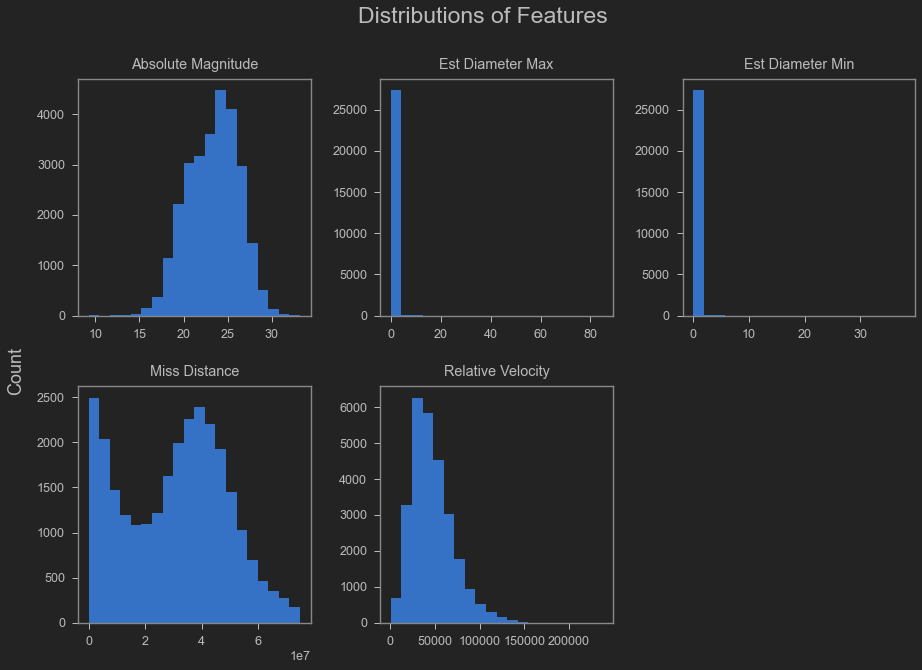

In [26]:
print('')
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax_arr = ax.flatten()

for i, j in zip(ax_arr, df.columns.values[[0, 1, 2, 4, 5]]):
    i.hist(df[j], bins=20)
    i.set_title(j.replace('_', ' ').title(), pad=10)
    
ax[1][2].axis('off')
plt.suptitle('Distributions of Features', fontsize=23)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
_=ax[0][0].text(s='Count', x=0, y=-1500, rotation=90, fontsize=18)

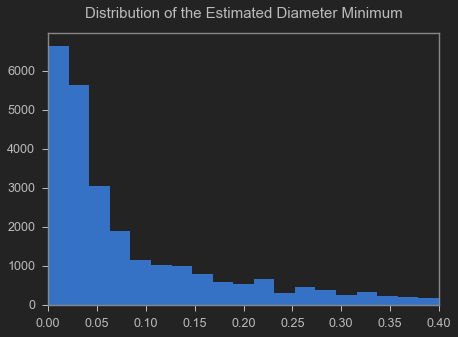

In [27]:
print('')
plt.figure(figsize=(7, 5))
plt.hist(df['est_diameter_min'], bins=np.linspace(0, 0.4, 20))
plt.xlim([0, 0.4])
_=plt.title('Distribution of the Estimated Diameter Minimum', pad=15, fontsize=15)

In [28]:
def scatter(x, y, xlabel, ylabel, title, data=df, c='cyan', **kwargs):
    print('')
    plt.figure(figsize=(7, 6))
    plt.scatter(data[x], data[y], c=c, **kwargs)
    plt.xlabel(xlabel, fontsize=12, labelpad=10)
    plt.ylabel(ylabel, fontsize=12, labelpad=10)
    plt.tick_params(axis='both', which='major', labelsize=11)
    plt.title(title, fontsize=15, pad=20)
    return

In [29]:
def scatter_subplots(x, y, title, data=df, c='cyan', **kwargs):
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    ax_arr = ax.flatten()
    
    for i, j in zip(ax_arr, y):
        i.scatter(data[x], data[j], c=c, **kwargs)
        i.set_xlabel(x.replace('_', ' '), labelpad=10, fontsize=12)
        i.set_ylabel(j.replace('_', ' '), labelpad=10, fontsize=12)
        i.set_title(j.replace('_', ' ').title(), pad=10)
        plt.suptitle(title, y=0.95, fontsize=20)
        
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
    return

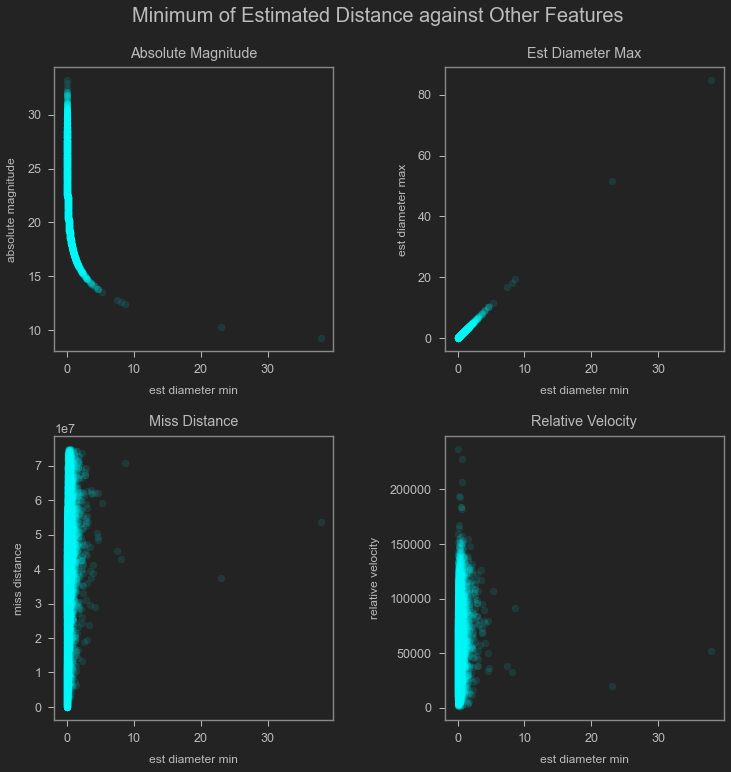

In [30]:
scatter_subplots('est_diameter_min', df.columns.values[[0, 1, 4, 5]], 
                 'Minimum of Estimated Distance against Other Features', alpha=0.1)

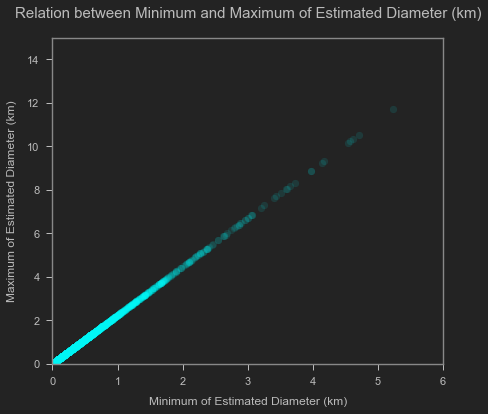

In [31]:
scatter('est_diameter_min', 'est_diameter_max', 'Minimum of Estimated Diameter (km)', 'Maximum of Estimated Diameter (km)', \
          'Relation between Minimum and Maximum of Estimated Diameter (km)', alpha=0.1)
plt.xlim([0,6])
_=plt.ylim([0,15])

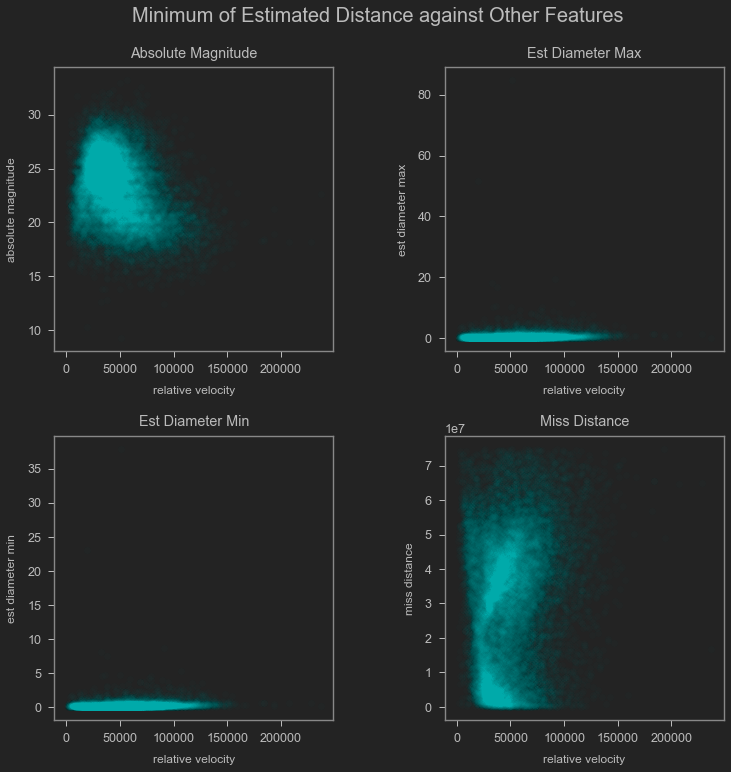

In [32]:
scatter_subplots('relative_velocity', df.columns.values[[0, 1, 2, 4]], 
                 'Minimum of Estimated Distance against Other Features', alpha=0.01)

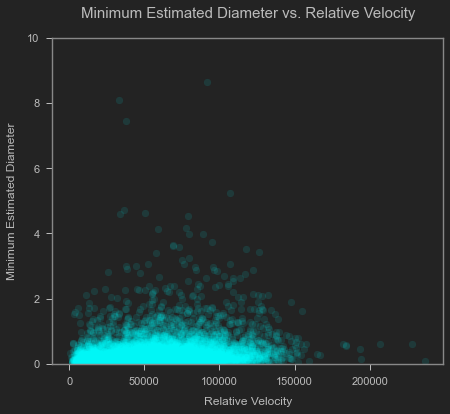

In [33]:
_=scatter('relative_velocity', 'est_diameter_min', 'Relative Velocity', 'Minimum Estimated Diameter',
         'Minimum Estimated Diameter vs. Relative Velocity', alpha=0.1)
_=plt.ylim([0, 10])

In [34]:
display(df.describe(), df[df['est_diameter_min']>6].describe())

,absolute_magnitude,est_diameter_max,est_diameter_min,hazardous,miss_distance,relative_velocity
count,27423.000000,27423.000000,27423.000000,27423.000000,2.742300e+04,27423.000000
mean,23.361668,0.310996,0.139082,0.079240,3.047301e+07,46824.940616
std,2.869921,0.837229,0.374420,0.270118,1.821554e+07,23357.218062
min,9.230000,0.001362,0.000609,0.000000,9.316925e+03,646.320239
25%,21.200000,0.047211,0.021113,0.000000,1.386736e+07,29807.541541
50%,23.600000,0.113250,0.050647,0.000000,3.276135e+07,42875.644455
75%,25.500000,0.342011,0.152952,0.000000,4.403119e+07,59651.963633
max,33.200000,84.730541,37.892650,1.000000,7.479865e+07,236990.128088


,absolute_magnitude,est_diameter_max,est_diameter_min,hazardous,miss_distance,relative_velocity
count,5.000000,5.000000,5.000000,5.0,5.000000e+00,5.000000
mean,11.464000,38.073737,17.027093,0.0,5.002404e+07,46642.155465
std,1.596881,29.857196,13.352544,0.0,1.294886e+07,27518.417921
min,9.230000,16.674007,7.456843,0.0,3.754117e+07,19682.887099
25%,10.310000,18.115068,8.101305,0.0,4.286086e+07,32852.598792
50%,12.440000,19.321462,8.640820,0.0,4.529595e+07,37715.974055
75%,12.580000,51.527608,23.043847,0.0,5.372124e+07,51496.923293
max,12.760000,84.730541,37.892650,0.0,7.070096e+07,91462.394087


In [35]:
def box_subplots(x, y, title, data=df, c='cyan', **kwargs):
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    ax_arr = ax.flatten()
    
    for i, j in zip(ax_arr, y):
        sns.boxplot(x=x, y=j, data=data, ax=i, **kwargs)
        i.set_xlabel(x.replace('_', ' '), labelpad=10, fontsize=12)
        i.set_ylabel(j.replace('_', ' '), labelpad=10, fontsize=12)
        i.set_title(j.replace('_', ' ').title(), pad=10)
        plt.suptitle(title, y=0.98, fontsize=25)
        
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
        
    return

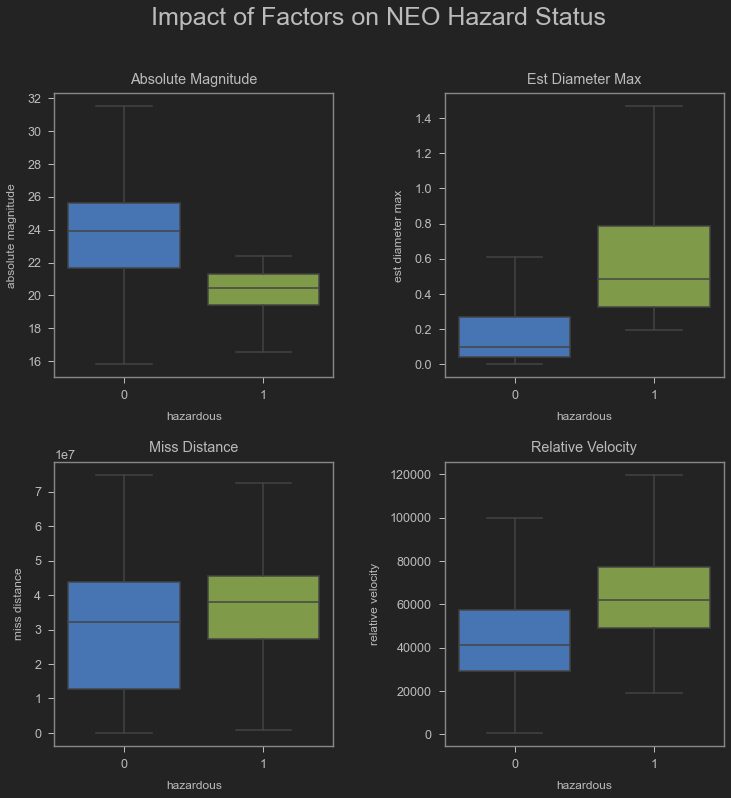

In [36]:
_=box_subplots('hazardous', df.columns.values[[0, 1, 4, 5]], 'Impact of Factors on NEO Hazard Status',
              showfliers=False)

In [37]:
from matplotlib.animation import FuncAnimation

<AxesSubplot:xlabel='miss_distance'>

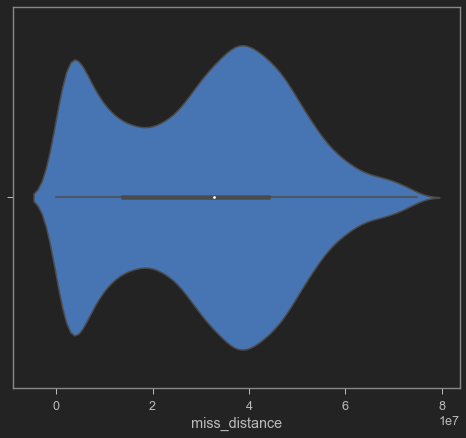

In [38]:
sns.violinplot(x='miss_distance', data=df)

In [39]:
df['miss_distance_bins'] = pd.cut(df['miss_distance'], bins=np.arange(0, 8*10**7, 10**7))
df.head()

,absolute_magnitude,est_diameter_max,est_diameter_min,hazardous,miss_distance,relative_velocity,miss_distance_bins
id,,,,,,,
2000433,10.31,51.527608,23.043847,0,3.754117e+07,19682.887099,"(30000000, 40000000]"
2000719,15.57,4.571303,2.044349,0,4.258288e+07,27551.597194,"(40000000, 50000000]"
2001036,9.23,84.730541,37.892650,0,5.372124e+07,51496.923293,"(50000000, 60000000]"
2001566,16.35,3.191832,1.427431,1,4.609560e+07,104242.329527,"(40000000, 50000000]"
2001580,14.69,6.855513,3.065879,0,4.413007e+07,107171.338891,"(40000000, 50000000]"


In [40]:
from scipy.stats import boxcox

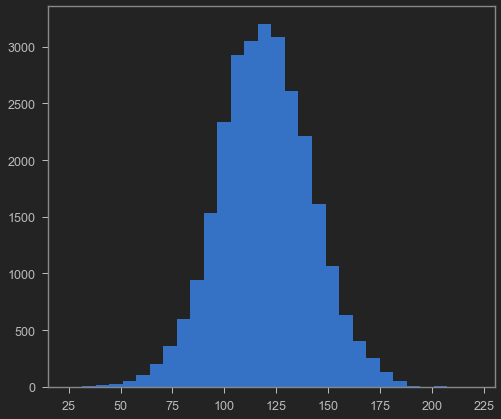

In [41]:
_=plt.hist(boxcox(df['relative_velocity'])[0], bins=30)

In [42]:
from scipy.stats import probplot

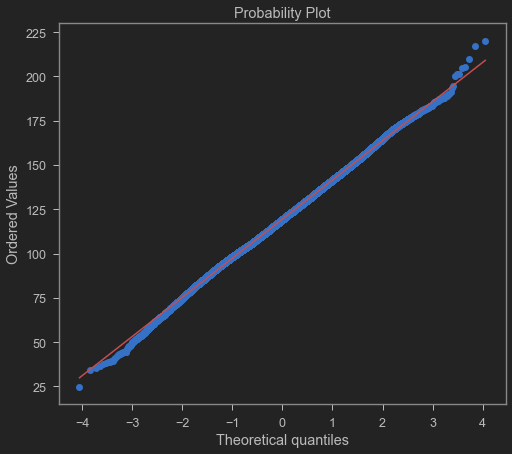

In [43]:
_=probplot(boxcox(df['relative_velocity'])[0], plot=plt)

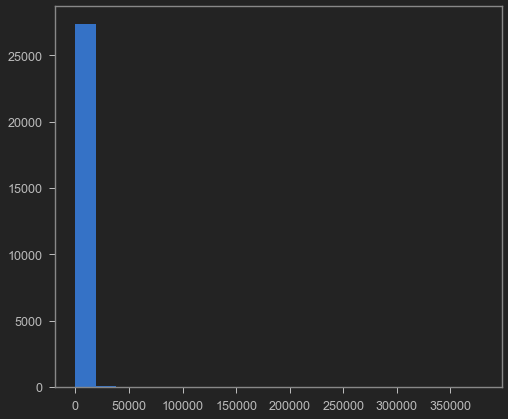

In [44]:
_=plt.hist(df['est_diameter_min']*10000, bins=20)

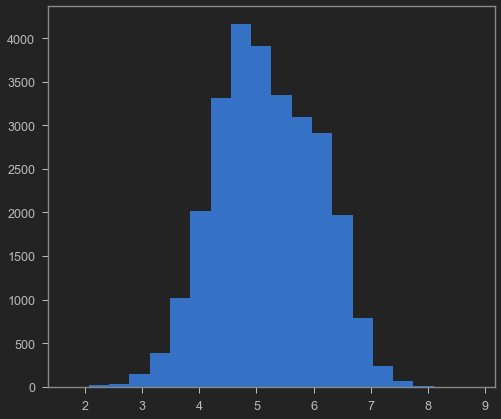

In [45]:
_=plt.hist(boxcox(df['est_diameter_min']*10000)[0], bins=20)

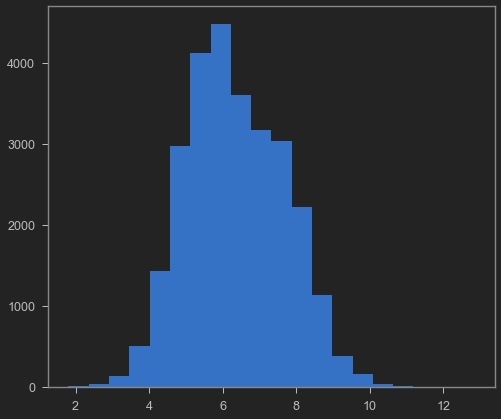

In [46]:
_=plt.hist(np.log(df['est_diameter_min']*10000), bins=20)

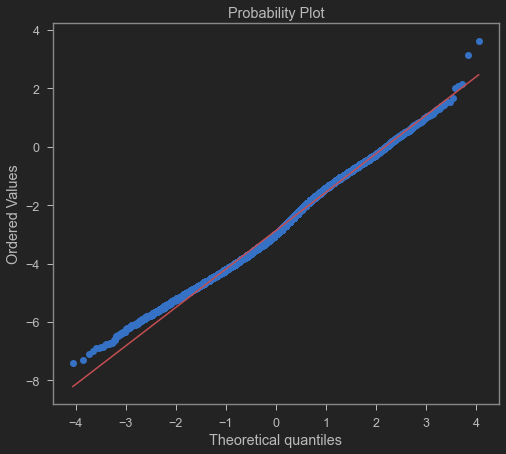

In [47]:
_, r= probplot(np.log(df['est_diameter_min']), plot=plt)

In [48]:
r[2]

0.9960648501694107

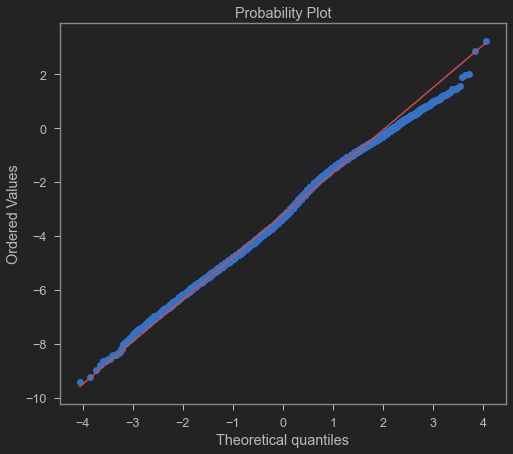

In [49]:
_, r= probplot(boxcox(df['est_diameter_min'])[0], plot=plt)

In [50]:
r[2]

0.9974394888341793

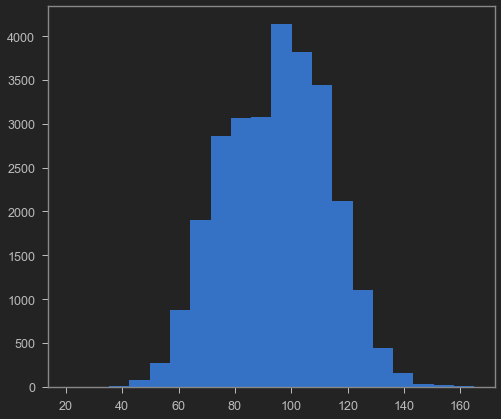

In [51]:
_=plt.hist(boxcox(df['absolute_magnitude'])[0], bins=20)

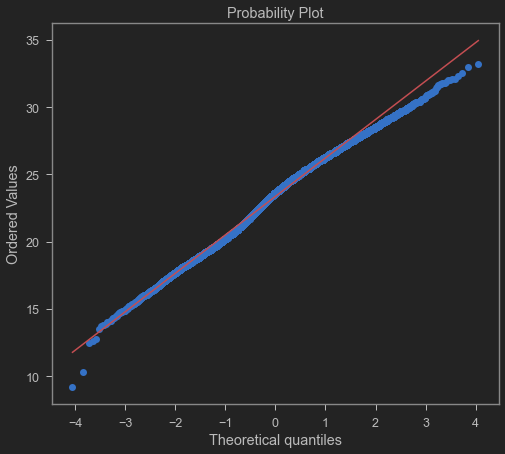

In [52]:
_, r= probplot(df['absolute_magnitude'], plot=plt)

In [53]:
r[2]

0.9960648501629276

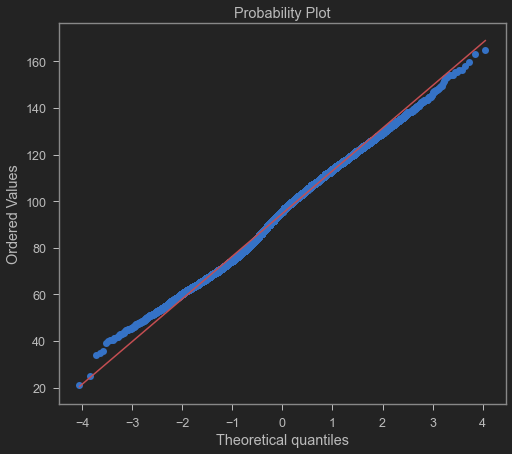

In [54]:
_, r= probplot(boxcox(df['absolute_magnitude'])[0], plot=plt)

In [55]:
r[2]

0.9972323446173741

In [56]:
df_transform = df.copy()

In [57]:
df_transform['relative_velocity'] = boxcox(df['relative_velocity'])[0]
df_transform['est_diameter_min'] = boxcox(df_transform['est_diameter_min']*10000)[0]
df_transform['absolute_magnitude'] = boxcox(df['absolute_magnitude'])[0]
df_transform.head()

,absolute_magnitude,est_diameter_max,est_diameter_min,hazardous,miss_distance,relative_velocity,miss_distance_bins
id,,,,,,,
2000433,25.121013,51.527608,8.590283,0,3.754117e+07,89.905524,"(30000000, 40000000]"
2000719,48.994981,4.571303,7.385614,0,4.258288e+07,101.586818,"(40000000, 50000000]"
2001036,20.963290,84.730541,8.815750,0,5.372124e+07,127.364670,"(50000000, 60000000]"
2001566,53.009492,3.191832,7.190852,1,4.609560e+07,164.136990,"(40000000, 50000000]"
2001580,44.606663,6.855513,7.600134,0,4.413007e+07,165.777121,"(40000000, 50000000]"


In [58]:
def my25(x):
    return np.percentile(x, 25)

def my75(x):
    return np.percentile(x, 75)

In [59]:
df_pol = pd.pivot_table(df_transform, index=['hazardous', 'miss_distance_bins'], 
               values=['est_diameter_min', 'relative_velocity', 'absolute_magnitude', 'miss_distance'],
              aggfunc={'est_diameter_min':'mean',
                      'relative_velocity': 'mean',
                      'absolute_magnitude': 'mean',
                      'miss_distance': [my25, my75]})
df_pol['miss_distance_mid'] = np.concatenate([np.arange(5*10**7, 65.1*10**7, 10*10**7), np.arange(5*10**7, 65.1*10**7, 10*10**7)]).astype('int')
df_pol['hazardous'] = [False]*7+[True]*7
df_pol['relative_velocity', 'mean'] = df_pol['relative_velocity', 'mean']/max(df_pol['relative_velocity', 'mean'])
df_pol['miss_distance', 'my25'] = round(df_pol['miss_distance', 'my25'], -5).astype('int')
df_pol['miss_distance', 'my75'] = round(df_pol['miss_distance', 'my75'], -5).astype('int')
df_pol['est_diameter_min'] = np.abs(df_pol['est_diameter_min'])
df_pol['absolute_magnitude'] = df_pol['absolute_magnitude']/100
df_pol.reset_index(drop=True, inplace=True)
df_pol

absolute_magnitude est_diameter_min miss_distance            \
                 mean             mean          my25      my75   
0            1.095037         4.479032       2100000   6600000   
1            0.988333         4.994715      12200000  17200000   
2            0.991105         4.979361      23000000  28000000   
3            0.988067         4.993671      32800000  37700000   
4            0.902970         5.403093      42200000  47100000   
5            0.793168         5.930247      51800000  56400000   
6            0.717832         6.291015      61800000  66900000   
7            0.768138         6.050689       5300000   8300000   
8            0.767631         6.053142      12500000  17600000   
9            0.753012         6.122999      23500000  27900000   
10           0.746226         6.155327      33300000  38200000   
11           0.745832         6.157301      42100000  46800000   
12           0.722072         6.270760      51600000  56100000   
13           0.692556         6.411923      61900000  66500000   

   relative_velocity miss_distance_mid hazardous  
                mean                              
0           0.759233          50000000     False  
1           0.742851         150000000     False  
2           0.752633         250000000     False  
3           0.773792         350000000     False  
4           0.789312         450000000     False  
5           0.804030         550000000     False  
6           0.848714         650000000     False  
7           0.836181          50000000      True  
8           0.848897         150000000      True  
9           0.881890         250000000      True  
10          0.901060         350000000      True  
11          0.904519         450000000      True  
12          0.932662         550000000      True  
13          1.000000         650000000      True

In [60]:
abs_min = min(df_pol['absolute_magnitude'].values)
abs_max = max(df_pol['absolute_magnitude'].values)
df_pol['absolute_magnitude'] = 0.25 + (0.75/(abs_max-abs_min))*(df_pol['absolute_magnitude'].values - abs_min)
df_pol['absolute_magnitude']

,mean
0,1.000000
1,0.801163
2,0.806328
3,0.800667
4,0.642094
5,0.437485
6,0.297101
7,0.390844
8,0.389898
9,0.362657


In [61]:
angle_adjust = np.array([np.arctan(1/i * np.tan(9*np.pi/24)) for i in range(3, 14, 2)])
angle_adjust = np.append(np.array([9*np.pi/24]), angle_adjust)
angle_adjust

array([1.17809725, 0.67762321, 0.44982781, 0.33211315, 0.26207625,
       0.21604849, 0.18361696])

In [62]:
iqr = df_pol['miss_distance', 'my75'] - df_pol['miss_distance', 'my25']
perc_theta = np.array(iqr/(2*max(iqr/2)))
angle_adjust_2 = np.append(angle_adjust, angle_adjust)
num = perc_theta - 1
den = 1/np.tan(angle_adjust_2) + perc_theta*angle_adjust_2
perc_theta_2 = np.arctan(num/den)
perc_theta_2

array([-0.08075278, -0.0102818 , -0.00780528, -0.01218354, -0.00985356,
       -0.02063162,  0.        , -0.35604421,  0.        , -0.05575601,
       -0.01218354, -0.01975621, -0.02477849, -0.01766164])

In [63]:
r_2 = np.array(df_pol.loc[df_pol['hazardous']==True, 'miss_distance_mid'])
r_2 = np.append(r_2, r_2)
perc_r_2 = np.array(r_2/np.cos(angle_adjust_2+perc_theta_2))
perc_r_2

array([1.09658464e+08, 1.90968504e+08, 2.76582836e+08, 3.68709205e+08,
       4.64703149e+08, 5.60671366e+08, 6.61113506e+08, 7.34517792e+07,
       1.92538484e+08, 2.70752254e+08, 3.68709205e+08, 4.63542924e+08,
       5.60216334e+08, 6.59054759e+08])

In [64]:
%%script echo skipping
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
plt.rcParams["animation.html"] = "jshtml"

with plt.style.context('dark_background'):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))
    plot_t = ax.plot([], [], [], [], [], [], [], [], [], [], [], [], [], [], color='yellow', marker='o', 
                     linestyle='none', alpha=1)
    plot_f = ax.plot([], [], [], [], [], [], [], [], [], [], [], [], [], [], color='lime', marker='o', 
                     linestyle='none', alpha=1)
    plot_perc_t = ax.plot([], [], [], [], [], [], [], [], [], [], [], [], [], [], color='yellow', alpha=1,
                         linewidth=3)
    plot_perc_f = ax.plot([], [], [], [], [], [], [], [], [], [], [], [], [], [], color='lime', alpha=1,
                         linewidth=3)
    ax.set_ylim([0,7*10**8])
    
ax.set_rlabel_position(20)
plt.text(s='Miss Distance ($10^8$ km)', x=0, y=1.8*10**8, rotation=20, fontsize=14, color='white')
ax.set_xticks([1/4*np.pi*i for i in range(8)], ['' for i in range(8)])

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
legend_lines=[Line2D([0], [0], marker='o', color='yellow', label='Hazardous', markersize=8),
             Line2D([0], [0], marker='o', color='lime', label='Not Hazardous', markersize=8)]

plt.legend(handles=legend_lines, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='large', 
           frameon=False)
plt.title('Differentiating Between Hazardous and Non-hazardous NEOs', pad=50, fontsize=25)

plots = plot_f[0:7] + plot_perc_f[0:7] + plot_t[0:7] + plot_perc_t[0:7]

alpha_f = np.hstack(df_pol.loc[df_pol['hazardous']==False, 'absolute_magnitude'].values)
alpha_f = np.append(alpha_f, alpha_f)

alpha_t = np.hstack(df_pol.loc[df_pol['hazardous']==True, 'absolute_magnitude'].values)
alpha_t = np.append(alpha_t, alpha_t)

for p, q in zip(range(14), alpha_f):
    plots[p].set_alpha(q)
    
for p, q in zip(range(14, 28), alpha_t):
    plots[p].set_alpha(q)
        
markersize_t = np.hstack(df_pol.loc[df_pol['hazardous']==True, 'est_diameter_min'].values)
markersize_f = np.hstack(df_pol.loc[df_pol['hazardous']==False, 'est_diameter_min'].values)
    
def animate(i):
    r = df_pol.loc[df_pol['hazardous']==True, 'miss_distance_mid'].values
    theta_t = np.hstack((i*2*np.pi*df_pol.loc[df_pol['hazardous']==True, 'relative_velocity']/200).values)
    theta_f = np.hstack((i*2*np.pi*df_pol.loc[df_pol['hazardous']==False, 'relative_velocity']/200).values)
    
    perc_t = np.vstack((np.array(theta_t).T - (perc_theta_2[7:]+angle_adjust), 
                       np.array(theta_t).T + (perc_theta_2[7:]+angle_adjust))).T
    perc_f = np.vstack((np.array(theta_f).T - (perc_theta_2[0:7]+angle_adjust), 
                       np.array(theta_f).T + (perc_theta_2[0:7]+angle_adjust))).T

    for j in range(len(plot_t[0:7])):
        plot_t[j].set_data(theta_t[j], r[j])
        plot_t[j].set_markersize(markersize_t[j]*3)
    
    for j in range(len(plot_f[0:7])):
        plot_f[j].set_data(theta_f[j], r[j])
        plot_f[j].set_markersize(markersize_f[j]*3)
    
    for j in range(len(plot_perc_t[0:7])):
        plot_perc_t[j].set_data(perc_t[j], perc_r_2[j+7])
    for j in range(len(plot_perc_f[0:7])):
        plot_perc_f[j].set_data(perc_f[j], perc_r_2[j])

    return plots

anim = FuncAnimation(fig, animate, frames=np.arange(1, 601), interval=20, blit=True)
_= anim.save('hazardous-true.mp4', writer='ffmpeg', fps=30)

Couldn't find program: 'echo'


In [65]:
%%script echo skipping
anim

Couldn't find program: 'echo'


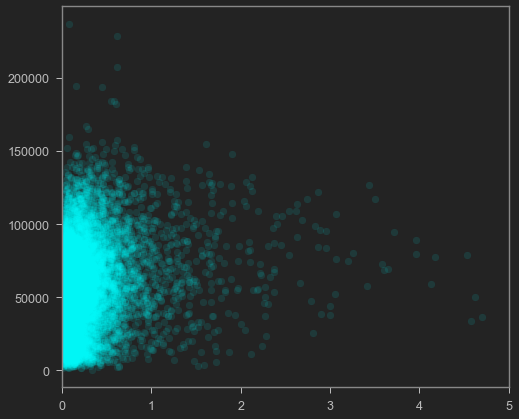

In [66]:
_=plt.scatter(df['est_diameter_min'], df['relative_velocity'], alpha=0.1, c='cyan')
_=plt.xlim([0,5])

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [68]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [69]:
df.columns.values

array(['absolute_magnitude', 'est_diameter_max', 'est_diameter_min',
       'hazardous', 'miss_distance', 'relative_velocity',
       'miss_distance_bins'], dtype=object)

In [70]:
X = df.iloc[:, [0, 2, 4, 5]].to_numpy()
y = df.iloc[:, 3]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [124]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [190]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

array([[-1.39548926,  0.5295628 ,  1.01516713, -0.43774569],
       [-0.13414499, -0.17557454,  0.83917675, -1.23725761],
       [ 1.74044954, -0.32591171,  0.6179663 , -0.20989508],
       ...,
       [ 0.90419919, -0.29808343, -0.76222001, -0.73363104],
       [ 0.49304277, -0.26805011, -0.44589845, -1.02434117],
       [-0.30836381, -0.13308128, -0.39079012,  0.34604615]])

In [126]:
lr = LogisticRegression(solver='newton-cg', random_state=11)

In [127]:
lr.fit(X_train_s, y_train)

LogisticRegression(random_state=11, solver='newton-cg')

In [131]:
lr_pred = lr.predict(X_test_s)

In [132]:
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cm_display = ConfusionMatrixDisplay(confusion_matrix=lr_cm, 
                                          display_labels=['non-hazardous', 'hazardous'])

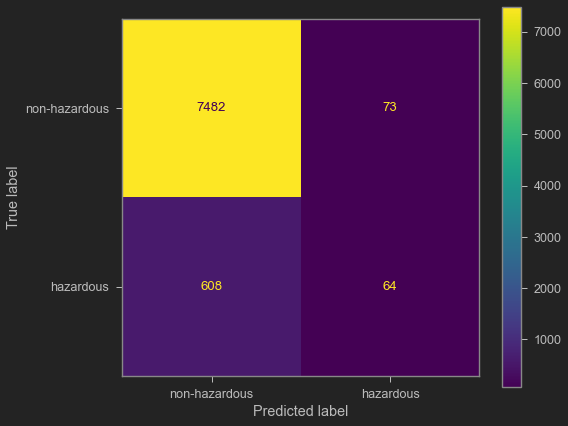

In [133]:
lr_cm_display.plot()

In [134]:
lr_cr = classification_report(y_test, lr_pred)

In [135]:
print(lr_cr)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7555
           1       0.47      0.10      0.16       672

    accuracy                           0.92      8227
   macro avg       0.70      0.54      0.56      8227
weighted avg       0.89      0.92      0.89      8227



In [146]:
lr_model = make_pipeline(StandardScaler(),
                      RandomOverSampler(random_state=11), 
                      LogisticRegression(solver='newton-cg', random_state=11))
lr_model.fit(X_train_s, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomoversampler', RandomOverSampler(random_state=11)),
                ('logisticregression',
                 LogisticRegression(random_state=11, solver='newton-cg'))])

In [147]:
lr_model_pred = lr_model.predict(X_test_s)

In [148]:
lr_model_cm = confusion_matrix(y_test, lr_model_pred)
lr_model_cm_display = ConfusionMatrixDisplay(confusion_matrix=lr_model_cm, 
                                          display_labels=['non-hazardous', 'hazardous'])

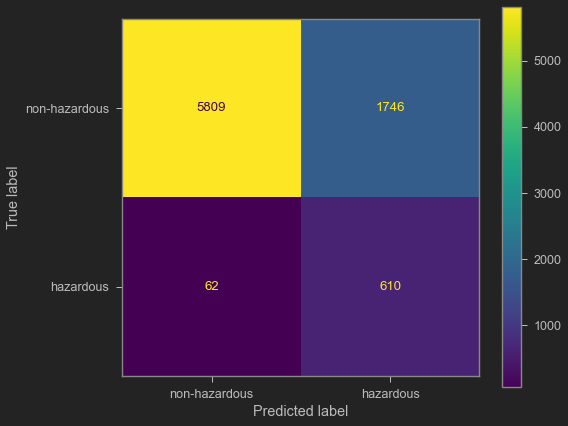

In [149]:
lr_model_cm_display.plot()

In [150]:
lr_model_cr = classification_report(y_test, lr_model_pred)

In [151]:
print(lr_model_cr)

              precision    recall  f1-score   support

           0       0.99      0.77      0.87      7555
           1       0.26      0.91      0.40       672

    accuracy                           0.78      8227
   macro avg       0.62      0.84      0.63      8227
weighted avg       0.93      0.78      0.83      8227



In [182]:
from imblearn.over_sampling import BorderlineSMOTE

In [183]:
borderline_lr_model = make_pipeline(StandardScaler(),
                      BorderlineSMOTE(random_state=11), 
                      LogisticRegression(solver='newton-cg', random_state=11))

In [184]:
borderline_lr_model.fit(X_train_s, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('borderlinesmote', BorderlineSMOTE(random_state=11)),
                ('logisticregression',
                 LogisticRegression(random_state=11, solver='newton-cg'))])

In [185]:
borderline_lr_pred = borderline_lr_model.predict(X_test_s)

In [186]:
borderline_lr_cm = confusion_matrix(y_test, borderline_lr_pred)
borderline_lr_cm_display = ConfusionMatrixDisplay(confusion_matrix=borderline_lr_cm, 
                                          display_labels=['non-hazardous', 'hazardous'])

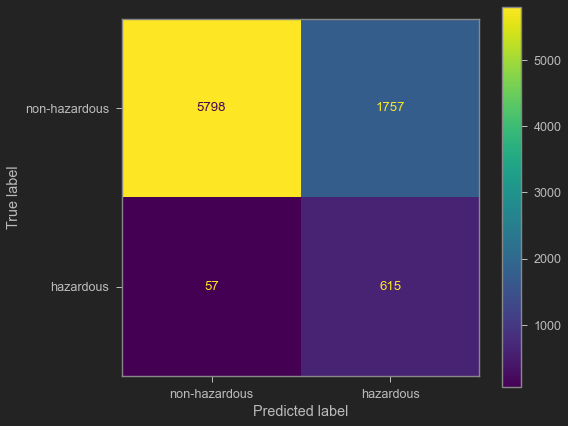

In [187]:
borderline_lr_cm_display.plot()

In [188]:
borderline_lr_report = classification_report(y_test, borderline_lr_pred)

In [189]:
print(borderline_lr_report)

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      7555
           1       0.26      0.92      0.40       672

    accuracy                           0.78      8227
   macro avg       0.62      0.84      0.63      8227
weighted avg       0.93      0.78      0.83      8227

